##### SIFT (Scale-Invariant Feature Transform)

Số keypoints SIFT: 1645
Kích thước descriptor: (1645, 128)


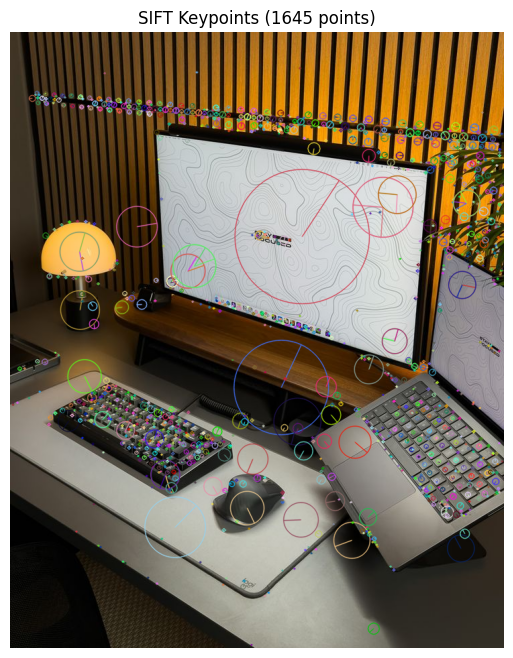

In [5]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('image.jpg')
sift = cv2.SIFT_create()

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
keypoints, descriptors = sift.detectAndCompute(gray, None)

img_sift = cv2.drawKeypoints(img_bgr, keypoints, None,
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(f"Số keypoints SIFT: {len(keypoints)}")
print(f"Kích thước descriptor: {descriptors.shape if descriptors is not None else 'None'}")

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Keypoints ({len(keypoints)} points)')
plt.axis('off')
plt.show()

##### SURF (Speeded-Up Robust Features)

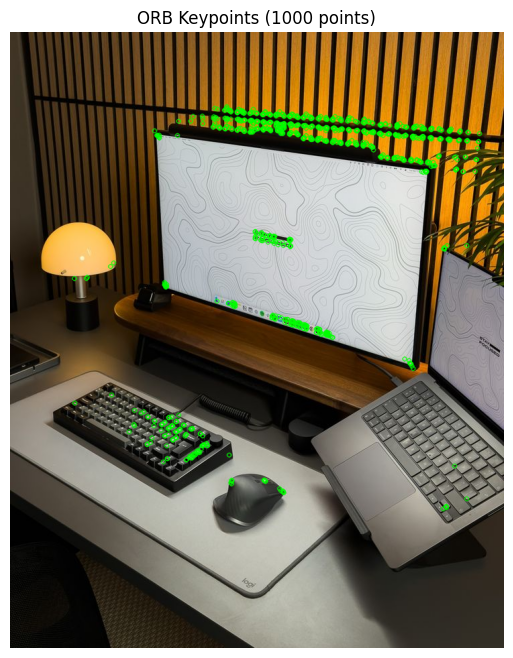

In [6]:
# SURF không có sẵn trong OpenCV thông thường, sử dụng ORB thay thế
# Hoặc cài đặt opencv-contrib-python để có SURF

# Nếu có SURF:
# surf = cv2.xfeatures2d.SURF_create(400)
# keypoints, descriptors = surf.detectAndCompute(gray, None)

# Sử dụng ORB thay thế (tương tự SURF)
orb = cv2.ORB_create(nfeatures=1000)
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)

img_orb = cv2.drawKeypoints(img_bgr, keypoints_orb, None, color=(0,255,0))

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
plt.title(f'ORB Keypoints ({len(keypoints_orb)} points)')
plt.axis('off')
plt.show()

##### ORB (Oriented FAST and Rotated BRIEF)

Số keypoints ORB: 500
Kích thước descriptor ORB: (500, 32)


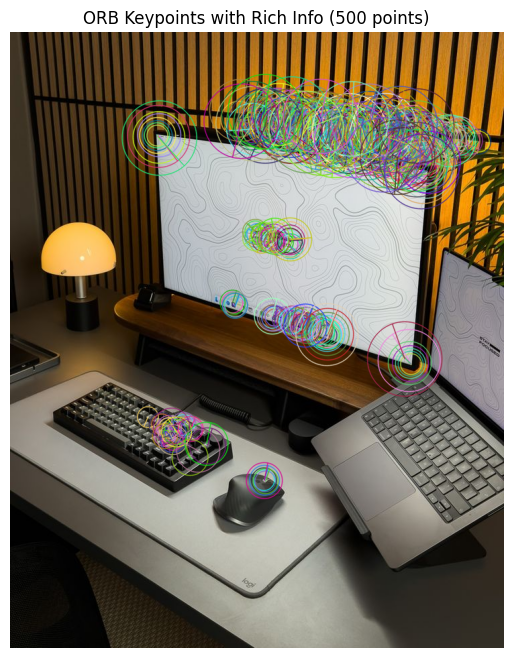

In [8]:
# Tạo ORB detector với các tham số tùy chỉnh
orb = cv2.ORB_create(
    nfeatures=500,          # Số lượng keypoints tối đa
    scaleFactor=1.2,        # Hệ số scale giữa các mức
    nlevels=8,              # Số mức trong pyramid
    edgeThreshold=31,       # Kích thước border
    firstLevel=0,           # Mức đầu tiên của pyramid
    WTA_K=2,               # Số điểm để tạo BRIEF descriptor
    patchSize=31           # Kích thước patch xung quanh keypoint
)

# Phát hiện và tính toán
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)

# Vẽ keypoints với thông tin chi tiết
img_orb_detailed = cv2.drawKeypoints(img_bgr, keypoints_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(f"Số keypoints ORB: {len(keypoints_orb)}")
print(f"Kích thước descriptor ORB: {descriptors_orb.shape if descriptors_orb is not None else 'None'}")

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_orb_detailed, cv2.COLOR_BGR2RGB))
plt.title(f'ORB Keypoints with Rich Info ({len(keypoints_orb)} points)')
plt.axis('off')
plt.show()